In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [3]:
xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')

xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
ive_df.tail()

xlb_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')
xlb_df.head()

xlk_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')

In [4]:
health_df = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')

industrial_df = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')

utilities_df = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')

In [5]:
rwr_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')
rwr_df.head()


spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')

In [6]:
xly_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')
xly_df.head()

xlp_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
xlp_df.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-05-05,22.63,23.22,22.63,23.22,14.6113,11600.0,0.0,1.0
2000-05-04,22.75,22.94,22.52,22.69,14.2778,30600.0,0.0,1.0
2000-05-03,22.94,22.97,22.50,22.69,14.2778,309800.0,0.0,1.0
2000-05-02,22.59,22.78,22.39,22.69,14.2778,19000.0,0.0,1.0
2000-05-01,22.50,22.81,22.16,22.63,14.2400,21200.0,0.0,1.0


In [7]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xlb_df = xlb_df['5. adjusted close']
xlb_df.head()

xlk_df = xlk_df['5. adjusted close']
xlk_df.head()

rwr_df = rwr_df['5. adjusted close']
rwr_df.head()

xly_df = xly_df['5. adjusted close']
xly_df.head()

xlp_df = xlp_df['5. adjusted close']
xlp_df.head()

xle_df = xle_df['5. adjusted close']
xle_df.head()

xlf_df = xlf_df['5. adjusted close']
xlf_df.head()

health_df = health_df['5. adjusted close']
health_df.head()

industrial_df = industrial_df['5. adjusted close']
industrial_df.head()

utilities_df = utilities_df['5. adjusted close']
utilities_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xlb_df, xlk_df, rwr_df, xly_df, xlp_df, xle_df, xlf_df, health_df, industrial_df, utilities_df], 
                      axis = "columns", join = "inner")
concat_df.head()


,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93


In [8]:
#Change column names to avoid confusion
columns = ['Materials close',
          'Tech close',
          'RE close',
          'Discretionary close',
          'Staples close',
          'Energy close',
          'Fin close',
          'HealthCare close',
          'Industrials close',
          'Utilities close']
concat_df.columns = columns
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close
date,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93


In [9]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close
date,,,,,,,,,,
2001-08-27,14.5697,19.3468,19.2651,21.4063,16.5804,19.2163,14.8913,21.1477,19.9793,15.4570
2001-08-28,14.4324,18.8107,19.2651,21.2256,16.3823,19.0149,14.6545,20.8504,19.5986,15.3859
2001-08-29,14.2494,18.4533,18.8996,20.8328,16.1332,18.9369,14.5223,20.6646,19.4670,15.2944
2001-08-30,14.1971,17.7384,18.8082,20.4086,16.2034,18.6641,14.4232,20.2409,19.1070,15.1166
2001-08-31,14.3213,17.8861,18.7625,20.7150,16.0820,18.6641,14.4672,20.4341,19.2801,15.1268


In [10]:
returns_df = concat_df.pct_change()
returns_df

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close
date,,,,,,,,,,
2001-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-08-28,-0.009424,-0.027710,0.000000,-0.008441,-0.011948,-0.010481,-0.015902,-0.014058,-0.019055,-0.004600
2001-08-29,-0.012680,-0.019000,-0.018972,-0.018506,-0.015205,-0.004102,-0.009021,-0.008911,-0.006715,-0.005947
2001-08-30,-0.003670,-0.038741,-0.004836,-0.020362,0.004351,-0.014406,-0.006824,-0.020504,-0.018493,-0.011625
2001-08-31,0.008748,0.008327,-0.002430,0.015013,-0.007492,0.000000,0.003051,0.009545,0.009060,0.000675
...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.026675,0.008575,0.038635,0.018708,0.002896,0.021664,0.034039,0.012863,0.024850,0.010460
2020-04-28,0.018558,-0.013312,0.017087,0.003935,0.005605,0.022901,0.010676,-0.020181,0.018700,0.003733
2020-04-29,0.025508,0.041043,0.022228,0.022038,-0.004222,0.074074,0.029049,0.006631,0.019135,-0.009129


In [11]:
# Drop nulls
returns_df.dropna(inplace=True)

#count nulls again
returns_df.isnull().sum()

Materials close        0
Tech close             0
RE close               0
Discretionary close    0
Staples close          0
Energy close           0
Fin close              0
HealthCare close       0
Industrials close      0
Utilities close        0
dtype: int64

In [12]:
# Checking for duplicate rows
returns_df.duplicated()

date
2001-08-28    False
2001-08-29    False
2001-08-30    False
2001-08-31    False
2001-09-04    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 4698, dtype: bool

In [13]:
# drop duplicates
returns_df.drop_duplicates(inplace=True)
returns_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close
date,,,,,,,,,,
2001-08-28,-0.009424,-0.027710,0.000000,-0.008441,-0.011948,-0.010481,-0.015902,-0.014058,-0.019055,-0.004600
2001-08-29,-0.012680,-0.019000,-0.018972,-0.018506,-0.015205,-0.004102,-0.009021,-0.008911,-0.006715,-0.005947
2001-08-30,-0.003670,-0.038741,-0.004836,-0.020362,0.004351,-0.014406,-0.006824,-0.020504,-0.018493,-0.011625
2001-08-31,0.008748,0.008327,-0.002430,0.015013,-0.007492,0.000000,0.003051,0.009545,0.009060,0.000675
2001-09-04,0.000000,-0.021721,-0.001620,0.005310,0.001194,0.005915,-0.004182,-0.004365,-0.009336,0.010412


In [15]:
# drop close columns to create dataframe for daily returns
returns_df.rename(columns={'Materials close': 'Materials return',
                           'Tech close': 'Tech return',
                          'RE close': 'RE return',
                          'Discretionary close': 'Discretionary return',
                          'Staples close': 'Staples return',
                          'Energy close': 'Energy return',
                          'Fin close': 'Fin return',
                          'HealthCare close': 'HealthCare return',
                          'Industrials close': 'Industrials return',
                          'Utilities close': 'Utilities return'},
                  inplace=True)
returns_df.head()

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return
date,,,,,,,,,,
2001-08-28,-0.009424,-0.027710,0.000000,-0.008441,-0.011948,-0.010481,-0.015902,-0.014058,-0.019055,-0.004600
2001-08-29,-0.012680,-0.019000,-0.018972,-0.018506,-0.015205,-0.004102,-0.009021,-0.008911,-0.006715,-0.005947
2001-08-30,-0.003670,-0.038741,-0.004836,-0.020362,0.004351,-0.014406,-0.006824,-0.020504,-0.018493,-0.011625
2001-08-31,0.008748,0.008327,-0.002430,0.015013,-0.007492,0.000000,0.003051,0.009545,0.009060,0.000675
2001-09-04,0.000000,-0.021721,-0.001620,0.005310,0.001194,0.005915,-0.004182,-0.004365,-0.009336,0.010412


In [16]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
cumulative_returns_RE = (1 + returns_df['RE return']).cumprod()
cumulative_returns_Discretionary = (1 + returns_df['Discretionary return']).cumprod()
cumulative_returns_Staples = (1 + returns_df['Staples return']).cumprod()
cumulative_returns_Energy = (1 + returns_df['Energy return']).cumprod()
cumulative_returns_Fin = (1 + returns_df['Fin return']).cumprod()
cumulative_returns_HealthCare = (1 + returns_df['HealthCare return']).cumprod()
cumulative_returns_Industrials = (1 + returns_df['Industrials return']).cumprod()
cumulative_returns_Utilities = (1 + returns_df['Utilities return']).cumprod()

In [17]:
cumulative_returns_materials

date
2001-08-28    0.990576
2001-08-29    0.978016
2001-08-30    0.974426
2001-08-31    0.982951
2001-09-04    0.982951
                ...   
2020-04-27    3.513456
2020-04-28    3.578660
2020-04-29    3.669945
2020-04-30    3.560815
2020-05-01    3.486002
Name: Materials return, Length: 4696, dtype: float64

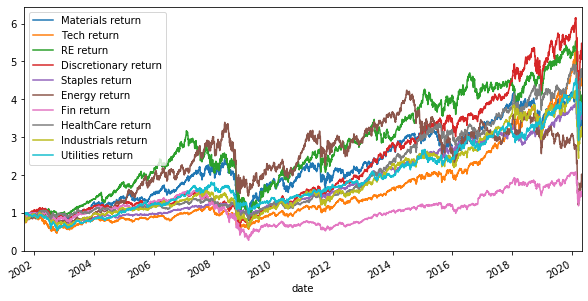

In [18]:
#plot cumulative returns

cumulative_returns_materials.plot(figsize=(10,5), legend=True)
cumulative_returns_tech.plot(figsize=(10,5), legend=True)
cumulative_returns_RE.plot(figsize=(10,5), legend=True)
cumulative_returns_Discretionary.plot(figsize=(10,5), legend=True)
cumulative_returns_Staples.plot(figsize=(10,5), legend=True)
cumulative_returns_Energy.plot(figsize=(10,5), legend=True)
cumulative_returns_Fin.plot(figsize=(10,5), legend=True)
cumulative_returns_HealthCare.plot(figsize=(10,5), legend=True)
cumulative_returns_Industrials.plot(figsize=(10,5), legend=True)
cumulative_returns_Utilities.plot(figsize=(10,5), legend=True)